<a href="https://colab.research.google.com/github/mkane968/Text-Mining-Experiments/blob/main/NLTK/Tutorial%203%3A%20Bigram%20Stemming%20%26%20Lemmatization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial 3: Bigram Stemming and Lemmatization

Begin by exploring reuters corpus by retrieving file ids and categories. Reuters is a corpus of news documents. More specifically, reuters is a corpus reader for the Reuters corpus which provides us with methods to access the corpus:

Importing and replace \n with spaces in reuters corpus

In [1]:
from nltk.corpus import reuters
nltk.download('reuters')

reuters.readme().replace('\n', ' ')

NameError: ignored

Retrieve file ids in reuter's corpus

In [ ]:
reuters.fileids()

Retrieve file id in specific position in reuters corpus

In [ ]:
reuters.fileids()[-1]

'training/9995'

Get length of files ids (number of files) in reuters corpus


In [ ]:
len(reuters.fileids())

10788

Retrieve reuters categories

In [ ]:
reuters.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

Retrieve sentences in specific file in reuters corpus

In [ ]:
nltk.download('punkt')
reuters.sents('test/14826')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-', 'JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'between', 'the', 'U', '.', 'S', '.', 'And', 'Japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'Asia', "'", 's', 'exporting', 'nations', 'that', 'the', 'row', 'could', 'inflict', 'far', '-', 'reaching', 'economic', 'damage', ',', 'businessmen', 'and', 'officials', 'said', '.'], ['They', 'told', 'Reuter', 'correspondents', 'in', 'Asian', 'capitals', 'a', 'U', '.', 'S', '.', 'Move', 'against', 'Japan', 'might', 'boost', 'protectionist', 'sentiment', 'in', 'the', 'U', '.', 'S', '.', 'And', 'lead', 'to', 'curbs', 'on', 'American', 'imports', 'of', 'their', 'products', '.'], ...]

Retrieving bigrams from files in Reuters corpus

Load words in files under "trade" category into new variable and get length

In [ ]:
trade_words = reuters.words(categories='trade')
len(trade_words)

142723

Put first 100 trade words in new variable

In [ ]:
trade_words_condensed = trade_words[:100]
trade_words_condensed

['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', ...]

Download and import stopwords from nltk

Remove stopwords from trade_words_condensed and lower case it

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

trade_words_condensed = [w.lower() for w in trade_words_condensed if w.lower() not in stopwords.words('english')]
trade_words_condensed[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['asian',
 'exporters',
 'fear',
 'damage',
 'u',
 '.',
 '.-',
 'japan',
 'rift',
 'mounting']

Remove punctuation

In [ ]:
import string 
# Contains string constants eg. ascii_lowercase which is 'a...z', string formatting functions, other string functions like .capwords() and .translate().

# trade_words_condensed = [w for w in trade_words_condensed if w not in string.punctuation]
punct_combo = [c + "\"" for c in string.punctuation ] + ["\"" + c for c in string.punctuation] + [".-", ":-", "..", "..."]
trade_words_condensed = [w for w in trade_words_condensed if w not in string.punctuation and w not in punct_combo]
trade_words_condensed


['asian',
 'exporters',
 'fear',
 'damage',
 'u',
 'japan',
 'rift',
 'mounting',
 'trade',
 'friction',
 'u',
 'japan',
 'raised',
 'fears',
 'among',
 'many',
 'asia',
 'exporting',
 'nations',
 'row',
 'could',
 'inflict',
 'far',
 'reaching',
 'economic',
 'damage',
 'businessmen',
 'officials',
 'said',
 'told',
 'reuter',
 'correspondents',
 'asian',
 'capitals',
 'u',
 'move',
 'japan',
 'might',
 'boost',
 'protectionist',
 'sentiment',
 'u',
 'lead',
 'curbs',
 'american',
 'imports',
 'products',
 'exporters',
 'said',
 'conflict',
 'would',
 'hurt',
 'long']

Get bigrams for words in cleaned trade word list

In [ ]:
from nltk import bigrams

bi_trade_words_condensed = list(bigrams(trade_words_condensed))
bi_trade_words_condensed[:5]

[('asian', 'exporters'),
 ('exporters', 'fear'),
 ('fear', 'damage'),
 ('damage', 'u'),
 ('u', 'japan')]

Create frequency distribution for bigrams in trade word list

Print frequency of each word bigram

In [ ]:
from nltk import FreqDist

bi_fdist = FreqDist(bi_trade_words_condensed)

for word, frequency in bi_fdist.most_common(3):
    print(word, frequency)

('u', 'japan') 2
('asian', 'exporters') 1
('exporters', 'fear') 1


Plot frequency distribution of word bigrams

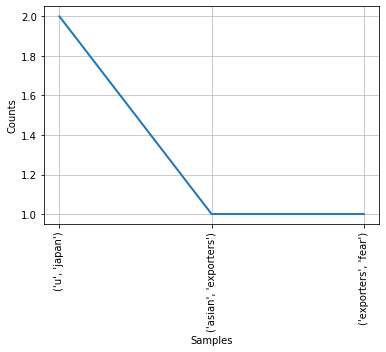

In [ ]:
bi_fdist.plot(3, cumulative=False)

***Stemming:*** Reducing inflected words to their stem, based on root form 

Load each stemmer as variable and specify language

Test how each imported stemmer stems sample text

In [ ]:
from nltk.stem import (PorterStemmer, LancasterStemmer)
from nltk.stem.snowball import SnowballStemmer # This is "Porter 2" and is considered the optimal stemmer.

porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer("english")

print(porter.stem('Re-testing'), lancaster.stem('Re-testing'), snowball.stem('Re-testing'))

re-test re-testing re-test


Fun fact: SnowballStemmer can stem several other languages beside English.

To make, for instance, a French stemmer, we can do the following: french_stemmer = SnowballStemmer('french')

In [ ]:
SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

This is an alternative that creates a dictionary mapping of every character from string.punctuation to None (this will also work but creates a whole dictionary so is slower)

This uses the 3-argument version of str.maketrans with arguments (x, y, z) where 'x' and 'y' must be equal-length strings and characters in 'x' are replaced by characters in 'y'. 'z' is a string (string.punctuation here) where each character in the string is mapped to None

In [ ]:
#translator = str.maketrans(dict.fromkeys(string.punctuation)
from nltk import word_tokenize

sentence = "So, we'll go no more a-roving. So late into the night, Though the heart be still as loving, And the moon be still as bright."

translator = str.maketrans('', '', string.punctuation)
translator

{33: None,
 34: None,
 35: None,
 36: None,
 37: None,
 38: None,
 39: None,
 40: None,
 41: None,
 42: None,
 43: None,
 44: None,
 45: None,
 46: None,
 47: None,
 58: None,
 59: None,
 60: None,
 61: None,
 62: None,
 63: None,
 64: None,
 91: None,
 92: None,
 93: None,
 94: None,
 95: None,
 96: None,
 123: None,
 124: None,
 125: None,
 126: None}

In [ ]:
tokens = word_tokenize(sentence.translate(translator))
tokens[:3]

['So', 'well', 'go']

In [ ]:
for stemmer in [porter, lancaster, snowball]:
    print([stemmer.stem(t) for t in tokens])

['So', 'well', 'go', 'no', 'more', 'arov', 'So', 'late', 'into', 'the', 'night', 'though', 'the', 'heart', 'be', 'still', 'as', 'love', 'and', 'the', 'moon', 'be', 'still', 'as', 'bright']
['so', 'wel', 'go', 'no', 'mor', 'arov', 'so', 'lat', 'into', 'the', 'night', 'though', 'the', 'heart', 'be', 'stil', 'as', 'lov', 'and', 'the', 'moon', 'be', 'stil', 'as', 'bright']
['so', 'well', 'go', 'no', 'more', 'arov', 'so', 'late', 'into', 'the', 'night', 'though', 'the', 'heart', 'be', 'still', 'as', 'love', 'and', 'the', 'moon', 'be', 'still', 'as', 'bright']


***Lemmatization:*** Aims to achieve a similar base "stem" for a word, but aims to derive the genuine dictionary root word, not just a truncated version of the word.

The default lemmatization method with the Python NLTK is the WordNet lemmatizer.


In [ ]:
nltk.download('wordnet')
from nltk import WordNetLemmatizer

wnl = WordNetLemmatizer()

print(wnl.lemmatize('brightening'), wnl.lemmatize('boxes'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
brightening box


As we saw above, sometimes, if we try to lemmatize a word, it will end up with the same word. This is because the default part of speech is nouns.


In [ ]:
wnl.lemmatize('brightening', pos='v')

'brighten'